In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import math
import sklearn

from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVR
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgb
from lightgbm import LGBMClassifier

%matplotlib inline

data=pd.read_csv("M1_final.csv")

In [2]:
data.columns=['A1','A2','A3','A4','A5','A6','A7','A8','A9','A10','A11','A12','A13','A14','A15','A16','A17','A18','A19','A20','A21','A22','A23']

data.dtypes


A1       int64
A2       int64
A3       int64
A4      object
A5      object
A6      object
A7       int64
A8       int64
A9       int64
A10      int64
A11      int64
A12      int64
A13      int64
A14     object
A15      int64
A16     object
A17      int64
A18      int64
A19    float64
A20     object
A21      int64
A22      int64
A23      int64
dtype: object

In [3]:
#preproccessing


data.drop('A4',inplace=True, axis='columns')
data.drop('A5',inplace=True, axis='columns')
data.drop('A6',inplace=True, axis='columns')
data.drop('A8',inplace=True, axis='columns')
data.drop('A9',inplace=True, axis='columns')
data.drop('A10',inplace=True, axis='columns')
data.drop('A11',inplace=True, axis='columns')
data.drop('A12',inplace=True, axis='columns')

data.columns=['A1','A2','A3','A4','A5','A6','A7','A8','A9','A10','A11','A12','A13','A14','A15']

data.dtypes

A1       int64
A2       int64
A3       int64
A4       int64
A5       int64
A6      object
A7       int64
A8      object
A9       int64
A10      int64
A11    float64
A12     object
A13      int64
A14      int64
A15      int64
dtype: object

In [4]:
X=data.iloc[:,:-1]
y=data.iloc[:,-1]

X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.9,random_state=1)
                                               
label_encoder=LabelEncoder()

X_train.columns=['A1','A2','A3','A4','A5','A6','A7','A8','A9','A10','A11','A12','A13','A14']

X_train['A6']=label_encoder.fit_transform(X_train['A6'])
X_train['A8']=label_encoder.fit_transform(X_train['A8'])
X_train['A12']=label_encoder.fit_transform(X_train['A12'])

X_test.columns=['A1','A2','A3','A4','A5','A6','A7','A8','A9','A10','A11','A12','A13','A14']

X_test['A6']=label_encoder.fit_transform(X_test['A6'])
X_test['A8']=label_encoder.fit_transform(X_test['A8'])
X_test['A12']=label_encoder.fit_transform(X_test['A12'])

<ipython-input-4-a4284a0b40e8>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['A6']=label_encoder.fit_transform(X_train['A6'])
<ipython-input-4-a4284a0b40e8>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['A8']=label_encoder.fit_transform(X_train['A8'])
<ipython-input-4-a4284a0b40e8>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas

In [5]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28820 entries, 0 to 28819
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      28820 non-null  int64  
 1   A2      28820 non-null  int64  
 2   A3      28820 non-null  int64  
 3   A4      28820 non-null  int64  
 4   A5      28820 non-null  int64  
 5   A6      28820 non-null  object 
 6   A7      28820 non-null  int64  
 7   A8      28818 non-null  object 
 8   A9      28820 non-null  int64  
 9   A10     28820 non-null  int64  
 10  A11     28820 non-null  float64
 11  A12     28820 non-null  object 
 12  A13     28820 non-null  int64  
 13  A14     28820 non-null  int64  
dtypes: float64(1), int64(10), object(3)
memory usage: 3.1+ MB


6.585676611593605


<AxesSubplot:title={'center':'Modal Coefficients'}>

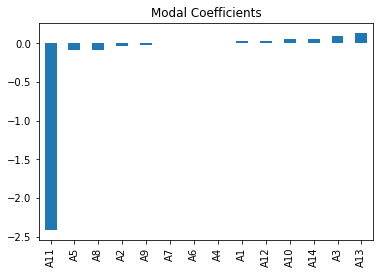

In [6]:
#1a.Linear Regression

l_reg=LinearRegression()
l_reg.fit(X_train,y_train)

p=l_reg.predict(X_test)

mse = sklearn.metrics.mean_squared_error(y_test, p)
rmse1a=math.sqrt(mse)

print(rmse1a)

pred=X_train.columns
coef=Series(l_reg.coef_,pred).sort_values()
coef.plot(kind='bar', title='Modal Coefficients')

6.585676695759223


<AxesSubplot:title={'center':'Modal Coefficients'}>

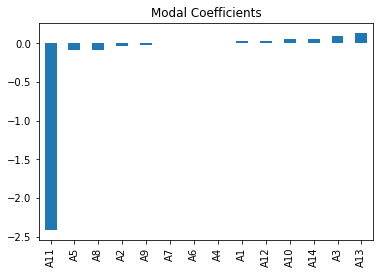

In [7]:
#1b.Ridge Regression

r_reg=Ridge(alpha=0.01)
r_reg.fit(X_train,y_train)

p=r_reg.predict(X_test)

mse = sklearn.metrics.mean_squared_error(y_test, p)
rmse1b=math.sqrt(mse)

print(rmse1b)

pred=X_train.columns
coef=Series(r_reg.coef_,pred).sort_values()
coef.plot(kind='bar', title='Modal Coefficients')


6.586676857882777


<AxesSubplot:title={'center':'Modal Coefficients'}>

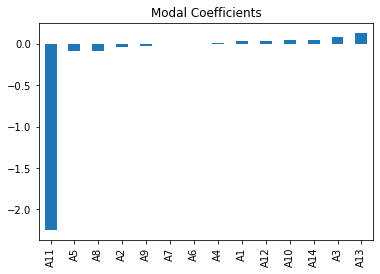

In [8]:
#1c.Lasso Regression

la_reg=Lasso(alpha=0.01)
la_reg.fit(X_train,y_train)

p=la_reg.predict(X_test)

mse = sklearn.metrics.mean_squared_error(y_test, p)
rmse1c=math.sqrt(mse)

print(rmse1c)

pred=X_train.columns
coef=Series(la_reg.coef_,pred).sort_values()
coef.plot(kind='bar', title='Modal Coefficients')

In [9]:
#1d.KNN model

knn=KNeighborsClassifier(n_neighbors=950)
knn.fit(X_train,y_train)

p=knn.predict(X_test)

mse = sklearn.metrics.mean_squared_error(y_test, p)
rmse1d=math.sqrt(mse)

print(rmse1d)

7.647304297057713


In [10]:
#1e.SVR

s=SVR(kernel='rbf')
s.fit(X_train,y_train)

p=s.predict(X_test)

mse = sklearn.metrics.mean_squared_error(y_test, p)
rmse1e=math.sqrt(mse)

print(rmse1e)

6.5587216209166375


In [11]:
#1f.Naive Bayes

nb=GaussianNB()
nb.fit(X_train,y_train)

p=nb.predict(X_test)

mse = sklearn.metrics.mean_squared_error(y_test, p)
rmse1f=math.sqrt(mse)

print(rmse1f)

8.42332853253198


In [12]:
#1g.Random Forest

rfc=RandomForestClassifier()
rfc.fit(X_train,y_train)

p=rfc.predict(X_test)

mse = sklearn.metrics.mean_squared_error(y_test, p)
rmse1g=math.sqrt(mse)

print(rmse1g)

7.888976312478573


In [13]:
#1h.LightGBM

lgbmc=LGBMClassifier()
lgbmc.fit(X_train,y_train)

p=lgbmc.predict(X_test)

mse = sklearn.metrics.mean_squared_error(y_test, p)
rmse1h=math.sqrt(mse)

print(rmse1h)

9.844682089365111


In [14]:
#one hot encoding data

data.columns=['A1','A2','A3','A4','A5','A6','A7','A8','A9','A10','A11','A12','A13','A14','A15']

ohe=OneHotEncoder(handle_unknown='ignore')

ohe_data=pd.DataFrame(ohe.fit_transform(data[['A6','A8','A12']]).toarray())

data.drop('A6',inplace=True, axis='columns')
data.drop('A8',inplace=True, axis='columns')
data.drop('A12',inplace=True, axis='columns')

data=data.join(ohe_data)

y=data['A15']

data.drop('A15',inplace=True, axis='columns')
X=data

X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.9,random_state=1)

In [15]:
#2a.Linear Regression

l_reg=LinearRegression()
l_reg.fit(X_train,y_train)

p=l_reg.predict(X_test)

mse = sklearn.metrics.mean_squared_error(y_test, p)
rmse2a=math.sqrt(mse)

print(rmse2a)

6.4472209717451054


In [16]:
#2b.Ridge Regression

r_reg=Ridge(alpha=0.01)
r_reg.fit(X_train,y_train)

p=r_reg.predict(X_test)

mse = sklearn.metrics.mean_squared_error(y_test, p)
rmse2b=math.sqrt(mse)

print(rmse2b)

6.4472196153481605


In [17]:
#2c.Lasso Regression

la_reg=Lasso(alpha=0.01)
la_reg.fit(X_train,y_train)

p=la_reg.predict(X_test)

mse = sklearn.metrics.mean_squared_error(y_test, p)
rmse2c=math.sqrt(mse)

print(rmse2c)

6.507509503535647


In [18]:
#2d.KNN model

knn=KNeighborsClassifier(n_neighbors=950)
knn.fit(X_train,y_train)

p=knn.predict(X_test)

mse = sklearn.metrics.mean_squared_error(y_test, p)
rmse2d=math.sqrt(mse)

print(rmse2d)

7.656826701856476


In [19]:
#2e.SVR

s=SVR(kernel='rbf')
s.fit(X_train,y_train)

p=s.predict(X_test)

mse = sklearn.metrics.mean_squared_error(y_test, p)
rmse2e=math.sqrt(mse)

print(rmse2e)

6.59212075064052


In [20]:
#2f.Naive Bayes

nb=GaussianNB()
nb.fit(X_train,y_train)

p=nb.predict(X_test)

mse = sklearn.metrics.mean_squared_error(y_test, p)
rmse2f=math.sqrt(mse)

print(rmse2f)

15.295504684938232


In [21]:
#2g.Random Forest

rfc=RandomForestClassifier()
rfc.fit(X_train,y_train)

p=rfc.predict(X_test)

mse = sklearn.metrics.mean_squared_error(y_test, p)
rmse2g=math.sqrt(mse)

print(rmse2g)

7.864152807228107


In [22]:
#2h.LightGBM

lgbmc=LGBMClassifier()
lgbmc.fit(X_train,y_train)

p=lgbmc.predict(X_test)

mse = sklearn.metrics.mean_squared_error(y_test, p)
rmse2h=math.sqrt(mse)

print(rmse2h)

8.639474949990872


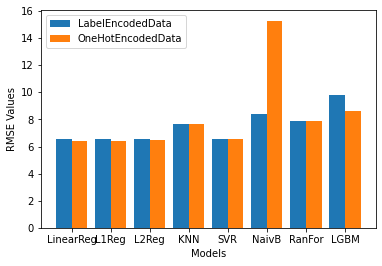

In [23]:
#Analysing

Cy1=np.array([rmse1a,rmse1b,rmse1c,rmse1d,rmse1e,rmse1f,rmse1g,rmse1h])
Cy2=np.array([rmse2a,rmse2b,rmse2c,rmse2d,rmse2e,rmse2f,rmse2g,rmse2h])

Cx=np.array(["LinearReg","L1Reg","L2Reg","KNN","SVR","NaivB","RanFor","LGBM"])

x_axis=np.arange(len(Cx))

plt.bar(x_axis-0.2,Cy1,0.4,label='LabelEncodedData')
plt.bar(x_axis+0.2,Cy2,0.4,label='OneHotEncodedData')

plt.xticks(x_axis,Cx)
plt.ylabel("RMSE Values")
plt.xlabel("Models")

plt.legend()
plt.show()